In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#Load dataset
df= pd.read_csv('big4_financial_risk_compliance.csv')
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [4]:
# Number of rows and columns
df.shape


(100, 12)

In [5]:
# Remove rows containing any missing values
df = df.dropna()

# Confirm removal
df.isnull().sum()


Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

In [6]:
# Fill numeric nulls with column mean
df = df.fillna(df.mean(numeric_only=True))

# Fill categorical nulls with mode (most frequent)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again
df.isnull().sum()


Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

In [7]:
# List all columns
df.columns.tolist()


['Year',
 'Firm_Name',
 'Total_Audit_Engagements',
 'High_Risk_Cases',
 'Compliance_Violations',
 'Fraud_Cases_Detected',
 'Industry_Affected',
 'Total_Revenue_Impact',
 'AI_Used_for_Auditing',
 'Employee_Workload',
 'Audit_Effectiveness_Score',
 'Client_Satisfaction_Score']

In [8]:
# Data types of each column
df.dtypes


Year                           int64
Firm_Name                     object
Total_Audit_Engagements        int64
High_Risk_Cases                int64
Compliance_Violations          int64
Fraud_Cases_Detected           int64
Industry_Affected             object
Total_Revenue_Impact         float64
AI_Used_for_Auditing          object
Employee_Workload              int64
Audit_Effectiveness_Score    float64
Client_Satisfaction_Score    float64
dtype: object

In [9]:
# Summary statistics

df.describe(include='all')

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100,100.000000,100.000000,100.000000
unique,NaN,4,NaN,NaN,NaN,NaN,4,NaN,2,NaN,NaN,NaN
top,NaN,Deloitte,NaN,NaN,NaN,NaN,Tech,NaN,No,NaN,NaN,NaN
freq,NaN,30,NaN,NaN,NaN,NaN,29,NaN,55,NaN,NaN,NaN
mean,2022.320000,NaN,2784.520000,277.730000,105.480000,52.700000,NaN,272.539000,NaN,60.250000,7.490000,7.339000
std,1.780251,NaN,1281.863073,135.735174,55.370101,28.311221,NaN,139.151401,NaN,11.163048,1.516209,1.429127
min,2020.000000,NaN,603.000000,51.000000,10.000000,5.000000,NaN,33.460000,NaN,40.000000,5.000000,5.000000
25%,2021.000000,NaN,1768.250000,162.500000,54.500000,27.000000,NaN,155.217500,NaN,52.750000,6.100000,6.100000
50%,2022.000000,NaN,2650.000000,293.000000,114.500000,54.000000,NaN,264.450000,NaN,60.000000,7.450000,7.350000
75%,2024.000000,NaN,4008.750000,395.500000,149.500000,74.500000,NaN,406.090000,NaN,68.000000,8.825000,8.525000


In [10]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [11]:
df.tail()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
95,2022,KPMG,4179,77,58,69,Healthcare,89.79,Yes,74,7.6,5.6
96,2020,Ernst & Young,2119,112,153,59,Tech,182.06,No,42,8.4,9.3
97,2021,Deloitte,3810,463,35,96,Healthcare,349.04,No,55,6.4,6.5
98,2025,Deloitte,1896,110,151,14,Finance,456.08,No,74,8.7,7.1
99,2021,PwC,4473,195,199,58,Finance,235.12,Yes,54,6.4,7.4


In [12]:
# Summary of dataset including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Count missing values in each column
df.isnull().sum()


Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

In [15]:
# Number of unique values in each column
df.nunique()


Year                           6
Firm_Name                      4
Total_Audit_Engagements      100
High_Risk_Cases               87
Compliance_Violations         78
Fraud_Cases_Detected          64
Industry_Affected              4
Total_Revenue_Impact         100
AI_Used_for_Auditing           2
Employee_Workload             40
Audit_Effectiveness_Score     47
Client_Satisfaction_Score     44
dtype: int64

In [16]:
# Descriptive statistics for categorical features
df.describe(include=['object'])


,Firm_Name,Industry_Affected,AI_Used_for_Auditing
count,100,100,100
unique,4,4,2
top,Deloitte,Tech,No
freq,30,29,55


In [17]:
# View first few entries of selected columns
df[['Firm_Name', 'Industry_Affected', 'AI_Used_for_Auditing']].head()


,Firm_Name,Industry_Affected,AI_Used_for_Auditing
0,PwC,Healthcare,No
1,Deloitte,Healthcare,Yes
2,PwC,Healthcare,No
3,PwC,Healthcare,No
4,PwC,Healthcare,No


In [18]:
# Count of each category in a column
df['Firm_Name'].value_counts()


Firm_Name
Deloitte         30
PwC              25
Ernst & Young    23
KPMG             22
Name: count, dtype: int64

In [19]:
# Correlation matrix for numerical features
df.corr(numeric_only=True)


,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
Year,1.000000,0.074125,0.053115,0.072821,0.133996,0.197986,-0.060485,0.085397,-0.016865
Total_Audit_Engagements,0.074125,1.000000,0.034309,0.106111,0.267385,-0.047823,-0.199313,0.035934,-0.142463
High_Risk_Cases,0.053115,0.034309,1.000000,-0.030904,0.122829,-0.006465,-0.009775,0.104043,-0.039145
Compliance_Violations,0.072821,0.106111,-0.030904,1.000000,-0.114610,0.112914,-0.062901,0.084088,0.022495
Fraud_Cases_Detected,0.133996,0.267385,0.122829,-0.114610,1.000000,0.012651,0.012033,-0.070547,-0.035708
Total_Revenue_Impact,0.197986,-0.047823,-0.006465,0.112914,0.012651,1.000000,-0.003495,0.029076,0.032209
Employee_Workload,-0.060485,-0.199313,-0.009775,-0.062901,0.012033,-0.003495,1.000000,-0.070690,0.034333
Audit_Effectiveness_Score,0.085397,0.035934,0.104043,0.084088,-0.070547,0.029076,-0.070690,1.000000,0.102411
Client_Satisfaction_Score,-0.016865,-0.142463,-0.039145,0.022495,-0.035708,0.032209,0.034333,0.102411,1.000000


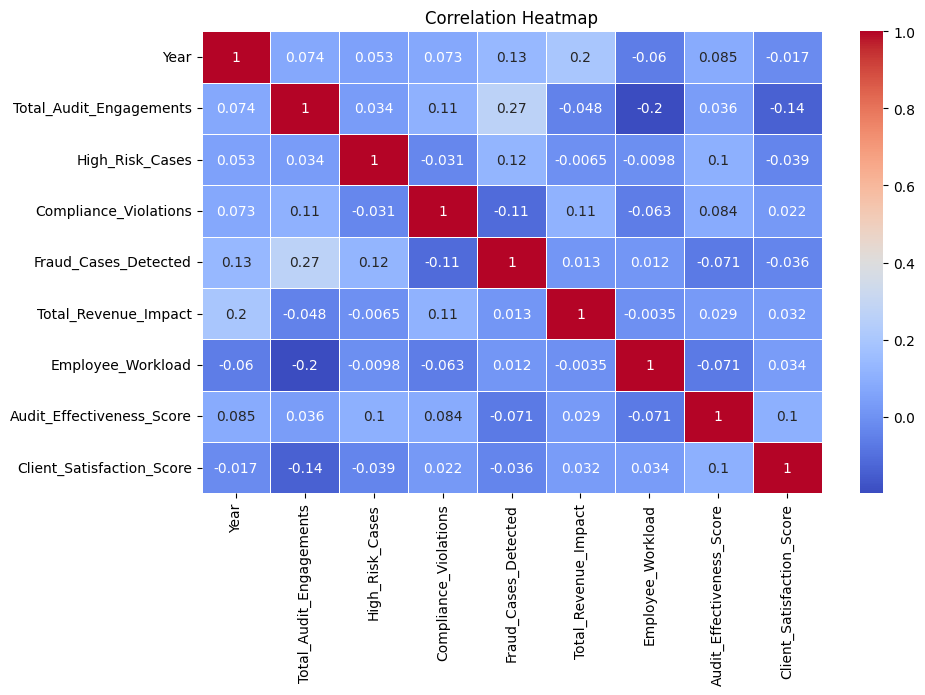

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


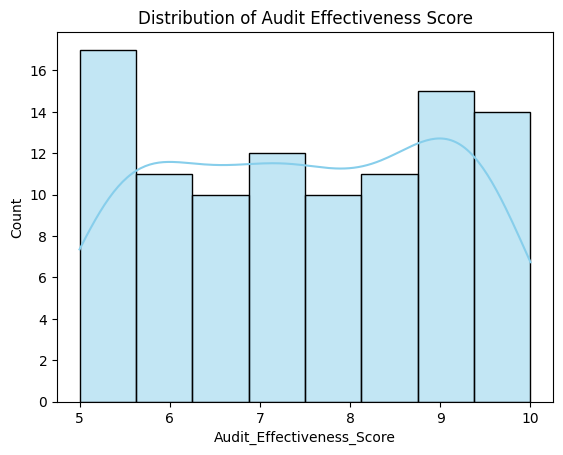

In [21]:
# Example: Distribution of Audit Effectiveness
sns.histplot(df['Audit_Effectiveness_Score'], kde=True, color='skyblue')
plt.title("Distribution of Audit Effectiveness Score")
plt.show()


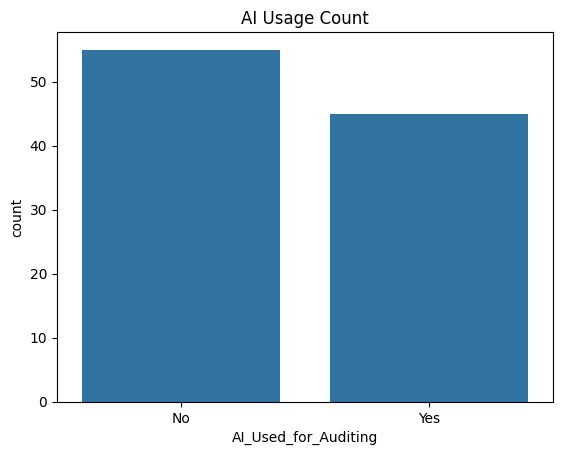

In [22]:
# Example: Count of AI Usage
sns.countplot(x='AI_Used_for_Auditing', data=df)
plt.title("AI Usage Count")
plt.show()


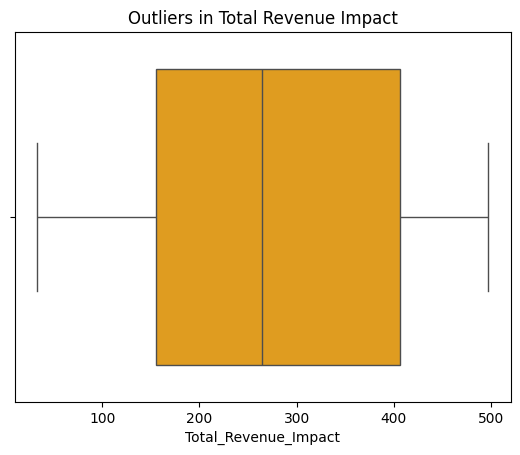

In [23]:
# Example: Detect outliers in Total Revenue Impact
sns.boxplot(x=df['Total_Revenue_Impact'], color='orange')
plt.title("Outliers in Total Revenue Impact")
plt.show()


In [24]:
# Average Audit Effectiveness by AI Usage
df.groupby("AI_Used_for_Auditing")["Audit_Effectiveness_Score"].mean()


AI_Used_for_Auditing
No     7.403636
Yes    7.595556
Name: Audit_Effectiveness_Score, dtype: float64

In [25]:
# Average Audit Effectiveness by AI Usage
df.groupby("AI_Used_for_Auditing")["Audit_Effectiveness_Score"].mean()


AI_Used_for_Auditing
No     7.403636
Yes    7.595556
Name: Audit_Effectiveness_Score, dtype: float64

In [26]:
# Total Revenue Impact per Industry
df.groupby("Industry_Affected")["Total_Revenue_Impact"].sum().sort_values(ascending=False)


Industry_Affected
Retail        8696.30
Tech          7141.81
Finance       5940.20
Healthcare    5475.59
Name: Total_Revenue_Impact, dtype: float64

In [27]:
print("✅ EDA Completed Successfully!")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Missing Values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())


✅ EDA Completed Successfully!
Rows: 100
Columns: 12
Missing Values: 0
Duplicates: 0
